In [1]:
import cv2 as cv
import os
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
def get_random_file(root_folder):
    all_files = []

    for foldername, subfolders, filenames in os.walk(root_folder):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            all_files.append(file_path)

    if not all_files:
        print("No files found in the specified folder.")
        return None

    random_file = random.choice(all_files)
    return random_file

Images/Iris System/MMU-Iris-Database/16/right/lowyfr1.bmp
pupil_center=(174, 114),pupil_radius=25
candidate radius=(44, 47),pupil_radius=25
radius_iris=47


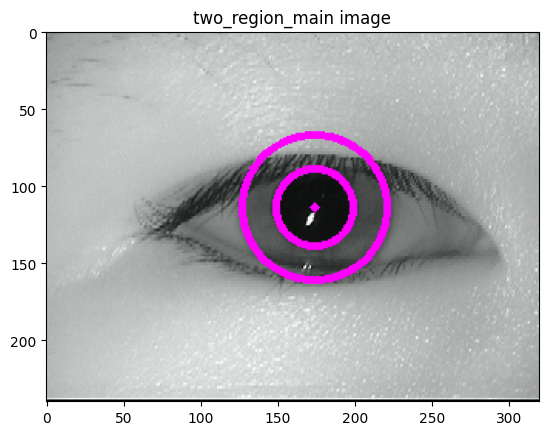

In [32]:
folder_path = os.path.join('Images','Iris System')
exclude_folder_name = ['Normalized_Images']

random_file_path = get_random_file(folder_path)
main_image = cv.imread(random_file_path)
if main_image is None:
    raise Exception(f'Error opening image!: {random_file_path}')

print(random_file_path)

gray_image = cv.cvtColor(main_image, cv.COLOR_BGR2GRAY)
rows,cols= gray_image.shape

blurred_image = cv.medianBlur(gray_image, 5)
circles = cv.HoughCircles(blurred_image, cv.HOUGH_GRADIENT, dp=1, minDist=rows/8,
                           param1=100, param2=30,
                           minRadius=20, maxRadius=50)
if circles is None:
    raise Exception("No circles detected. Error")

if(len(circles)>1):
    raise Exception("Multiple circles detected. Error")

if(len(circles)<1):
    raise Exception("No circles detected. Error")

circles = np.uint16(np.around(circles))

pupil_center = (circles[0,0,0], circles[0,0,1])
# circle center
cv.circle(main_image, pupil_center, 1, (255, 0, 255), 3)
# circle outline
pupil_radius = circles[0,0,2]
cv.circle(main_image, pupil_center, pupil_radius, (255, 0, 255), 3)

print(f"pupil_center={pupil_center},pupil_radius={pupil_radius}")

r=pupil_radius
min_r=int(1.5*r)
max_r=int(2.2*r)
xc,yc=pupil_center

arr=np.array(blurred_image).reshape(rows,cols).astype(int)

dI_right=np.zeros((max_r-min_r))
dI_left=np.zeros((max_r-min_r))

for i in range(xc+min_r,xc+max_r):
    dI_right[i-(xc+min_r)]=abs(arr[pupil_center[0],i+2]+arr[pupil_center[0],i+1]-arr[pupil_center[0],i-1]-arr[pupil_center[0],i-2])

for i in range(xc-max_r,xc-min_r):
    dI_left[i-(xc-max_r)]=abs(arr[pupil_center[0],i+2]+arr[pupil_center[0],i+1]-arr[pupil_center[0],i-1]-arr[pupil_center[0],i-2])
    
r1=min_r+np.argmax(dI_right)
r2=min_r+np.argmax(dI_left)
print(f"candidate radius={r1,r2},pupil_radius={r}")

diff_r = abs(r1 - 2*r)
diff_l = abs(r2 - 2*r)

if diff_r < diff_l:
    radius3=r1
else :
    radius3=r2

print(f"radius_iris={radius3}")

cv.circle(main_image, pupil_center, int(radius3), (255, 0, 255), 3)

plt.title("two_region_main image")
plt.imshow(main_image)